In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
     

In [2]:
data = pd.read_csv("New Dataset 5000.csv")

In [3]:
data.shape

(5091, 16)

In [4]:
data.head()

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [5]:
data.isnull().sum()

StationId     0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [6]:
df = data.drop(['StationId', 'Datetime', 'AQI_Bucket'], axis=1)

In [7]:
df

PM2.5    PM10     NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0     35.25   88.50   2.12   33.10  19.30  14.10  0.96  1.97  67.25     4.98   
1     32.00   73.50   2.17   20.30  12.60  13.80  0.17  2.77  80.75     3.40   
2     20.50   58.00   3.00   17.35  11.65  13.48  1.53  2.95  77.22     2.02   
3     21.00   50.00   2.73   18.28  11.93  13.50  2.96  2.02  36.35     1.42   
4     18.50   43.50   2.20   16.38  10.45  15.13  3.49  2.20  70.90     1.20   
...     ...     ...    ...     ...    ...    ...   ...   ...    ...      ...   
5086  40.75   93.75   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30   
5087  64.25  151.75   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22   
5088  82.25  179.50  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55   
5089  78.25  165.00  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62   
5090  75.50  160.75  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65   

      Toluene  Xylene  AQI  
0        7.43    2.70  168  
1        4.27    1.57  124  
2        2.55    1.18  124  
3        1.57    0.80  124  
4        1.10    1.03  124  
...       ...     ...  ...  
5086     7.35    3.00  106  
5087    16.48    8.20  106  
5088    23.40   12.93  106  
5089    24.93   15.65  107  
5090    22.52   15.62  108  

[5091 rows x 13 columns]

In [8]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [9]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, random_state=30)

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
     

In [11]:
X_train
X_test

array([[-0.16991321,  0.29907412,  0.21946767, ...,  1.3410734 ,
         0.91059238,  0.60449421],
       [-0.37625766, -0.74166608, -0.73969519, ..., -0.42903662,
        -0.19224382, -0.46424739],
       [-0.31022743,  1.04506834,  0.84031877, ...,  0.14175973,
        -0.26159248,  0.06115316],
       ...,
       [-0.12864432, -0.4893993 , -0.46205891, ..., -0.95173215,
        -0.8635773 , -0.56163871],
       [-0.24213377, -0.62689773, -0.60915098, ..., -0.63106005,
        -0.79133912, -0.55907578],
       [ 0.63895702,  0.86918959,  0.91202615, ...,  0.59711412,
        -0.29530363, -0.24127252]])

In [12]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [13]:
lm=LinearRegression()
lm

LinearRegression()

In [14]:
lm.fit(X_train,Y_train)


LinearRegression()

In [15]:
rid=Ridge()
rid

Ridge()

In [16]:
rid.fit(X_train,Y_train)


Ridge()

In [17]:
la=Lasso()
la

Lasso()

In [18]:
la.fit(X_train,Y_train)


Lasso()

In [19]:
elNet=ElasticNet()
elNet

ElasticNet()

In [20]:
elNet.fit(X_train,Y_train)


ElasticNet()

In [21]:

pred_test_lm=lm.predict(X_test)
pred_test_rid=rid.predict(X_test)
pred_test_la=la.predict(X_test)

pred_test_elNet=elNet.predict(X_test)

In [22]:
print("Linear Regression Model")
metrics.mean_squared_error(Y_test,pred_test_lm)



Linear Regression Model


440.8235008435249

In [23]:
metrics.r2_score(Y_test,pred_test_lm)


0.752198180718266

In [24]:
lm.score(X_test,Y_test)


0.752198180718266

In [25]:

print("Ridge Regression Model")
metrics.mean_squared_error(Y_test,pred_test_rid)

Ridge Regression Model


439.022558776972

In [26]:
metrics.r2_score(Y_test,pred_test_rid)


0.7532105512467402

In [27]:

print("Lassso Regression Model")
metrics.mean_squared_error(Y_test,pred_test_la)

Lassso Regression Model


446.1327866460407

In [28]:
metrics.r2_score(Y_test,pred_test_la)


0.7492136513580288

In [29]:
print("ElasticNet Regression Model")
metrics.mean_squared_error(Y_test,pred_test_elNet)

ElasticNet Regression Model


510.64667672730343

In [30]:
metrics.r2_score(Y_test,pred_test_elNet)


0.7129482088385444

In [31]:
from sklearn.model_selection import GridSearchCV


In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
parameters={'alpha':[1,5,10,20,35,45,50,55,60,75,85,90,100]}
ridge_regressor=GridSearchCV(rid,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 20, 35, 45, 50, 55, 60, 75, 85, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [34]:
ridge_regressor.best_params_


{'alpha': 1}

In [35]:
ridge_regressor.best_score_


-434.6781710911338

In [36]:
best_alpha = 1
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, Y_train)

# Predict on the test set
pred_test_ridge = ridge.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_ridge = metrics.r2_score(Y_test, pred_test_ridge)
mse_ridge = metrics.mean_squared_error(Y_test, pred_test_ridge)

print("Ridge Regression Model")
print("R-squared Score:", r2_ridge)
print("Mean Squared Error:", mse_ridge)



Ridge Regression Model
R-squared Score: 0.7532105512467402
Mean Squared Error: 439.022558776972


In [37]:

parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
lasso_regressor=GridSearchCV(la,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)

C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.650e+05, tolerance: 5.383e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.761e+05, tolerance: 5.409e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.855e+05, toler

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [38]:
lasso_regressor.best_params_


{'alpha': 0.0001}

In [39]:
lasso_regressor.best_score_


-434.63067216137927

In [45]:
best_alpha = 0.0001
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, Y_train)

# Predict on the test set
pred_test_lasso = lasso.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_lasso = metrics.r2_score(Y_test, pred_test_lasso)
mse_lasso = metrics.mean_squared_error(Y_test, pred_test_lasso)

print("lasso Regression Model")
print("R-squared Score:", r2_lasso)
print("Mean Squared Error:", mse_lasso)



lasso Regression Model
R-squared Score: 0.753057950392048
Mean Squared Error: 439.29402588400166


C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.474e+05, tolerance: 6.766e+02
  model = cd_fast.enet_coordinate_descent(


In [41]:

parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
elNet_regressor=GridSearchCV(elNet,parameters,scoring='neg_mean_squared_error',cv=5)
elNet_regressor.fit(X_train,Y_train)

C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.789e+05, tolerance: 5.383e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+05, tolerance: 5.409e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.944e+05, toler

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [42]:
elNet_regressor.best_params_


{'alpha': 0.0001}

In [43]:
elNet_regressor.best_score_


-434.6417022527212

In [44]:
best_alpha = 0.0001
elastic = ElasticNet(alpha=best_alpha)
elastic.fit(X_train, Y_train)

# Predict on the test set
pred_test_elastic = elastic.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_elastic = metrics.r2_score(Y_test, pred_test_elastic)
mse_elastic = metrics.mean_squared_error(Y_test, pred_test_elastic)

print("elastic Regression Model")
print("R-squared Score:", r2_elastic)
print("Mean Squared Error:", mse_elastic)



elastic Regression Model
R-squared Score: 0.7531397571763196
Mean Squared Error: 439.1484968756195


C:\Users\SWARUP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.602e+05, tolerance: 6.766e+02
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Linear Regression')

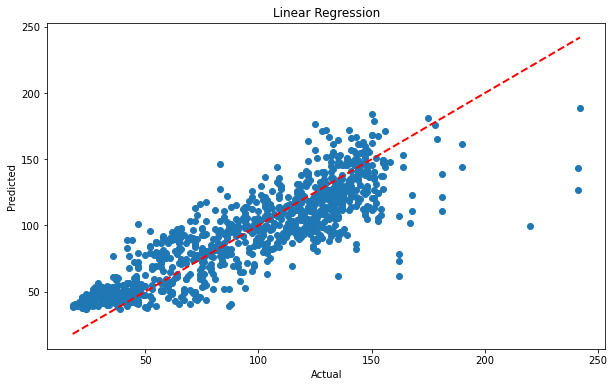

In [46]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_lm)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Ridge Regression')

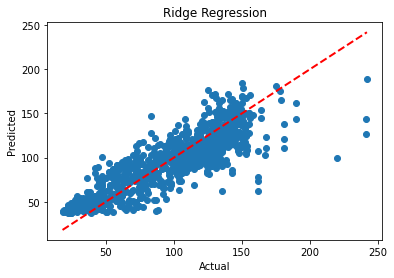

In [47]:
# Ridge Regression
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_rid)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

Text(0.5, 1.0, 'Lasso Regression')

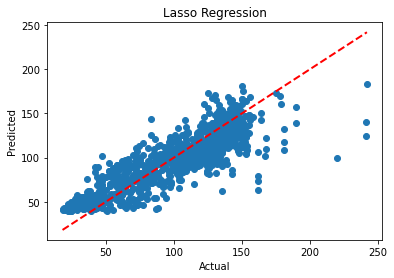

In [48]:
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_la)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

Text(0.5, 1.0, 'ElasticNet Regression')

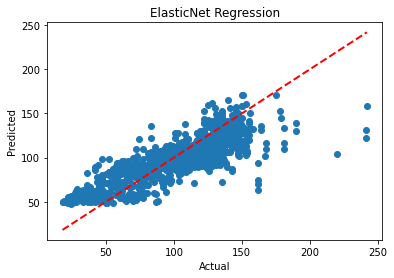

In [49]:
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_elNet)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ElasticNet Regression')